##Necessary Libraries


In [ ]:
from PIL import Image as im
import numpy as np
from matplotlib import pyplot as plt
import os

import cvxopt
import cvxopt.solvers

##Downloading Dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def read_image_train(path):
  X = []
  number_of_folders = 5
  files = ["s"+str(i+1)+"/" for i in range(number_of_folders)]
  for i in files:
    for j in range(1, 11):
      imagePath = path + i + str(j) + '.jpg'
      img = im.open(imagePath).convert('L')
      img = img.resize ((100, 100) , im.ANTIALIAS)
      img_mat = np.array(img).flatten()
      X.append(img_mat)
  return X

In [ ]:
def read_image_test(path):
  X = []
  for j in range(1, 31):
    imagePath = path + str(j) + '.jpg'
    img = im.open(imagePath).convert('L')
    img = img.resize ((100, 100) , im.ANTIALIAS)
    img_mat = np.array(img).flatten()
    X.append(img_mat)
  return X

In [ ]:
#if the dataset is in local drive, then use path 'Faces/train' or the full path of folder 'train' if the dataset is not in same location.

X = read_image_train('/content/drive/My Drive/Faces/train/')
X = np.vstack(X)

In [ ]:
#if the dataset is in local drive, then use path 'Faces/test' or the full path of folder 'test' if the dataset is not in same location.

X_test = read_image_test('/content/drive/My Drive/Faces/test/')
X_test = np.vstack(X_test)

In [ ]:
X.shape

(50, 10000)

In [ ]:
# import cv2
# newX = np.zeros((X.shape[0], 2500), dtype = np.float64)
# for i in range(X.shape[0]):
#   temp = X[i].reshape(100,100)
#   half = cv2.resize(temp, (0, 0), fx = 0.1, fy = 0.1)
#   newX[i] = half.flatten()

In [ ]:
y_train = []
for i in range(5):
  for j in range(10):
    y_train.append(i)

y_test = []
for i in range(5):
  for j in range(6):
    y_test.append(i)

y_train = np.array(y_train)
y_test = np.array(y_test)

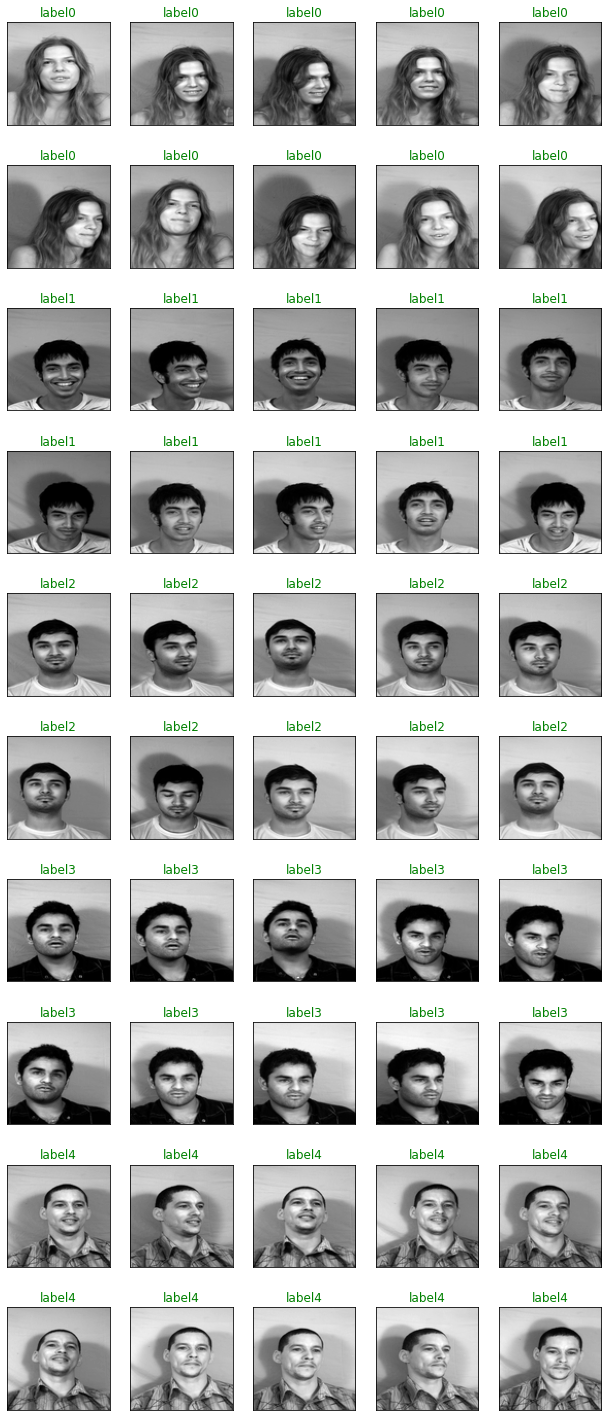

In [ ]:
for i in range(X.shape[0]):
  img = X[i].reshape(100,100)
  plt.subplot(10,5,1+i)
  plt.imshow(img, cmap='gray')
  plt.title("label"+str(y_train[i]), color='g')
  plt.subplots_adjust(right=1.5, top=5)
  plt.tick_params(labelleft=False, labelbottom=False, bottom=False,top=False,right=False,left=False, which='both')
plt.show()

##Dataset Normalization

In [ ]:
meanface = np.mean(X, axis = 0)
meanface.shape

(10000,)

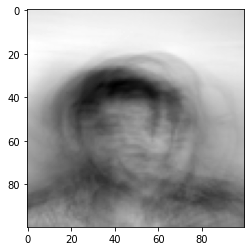

In [ ]:
plt.imshow(meanface.reshape(100 ,100),cmap='gray')
plt.show()

In [ ]:
X_normalize = X - meanface
X_normalize.shape

(50, 10000)

##PCA Dimentionality Deduction

In [ ]:
covariance_matrix = np.cov(X_normalize.T)
covariance_matrix.shape

(10000, 10000)

In [ ]:
eigen_vals, eigen_vecs = np.linalg.eig(covariance_matrix)
print(eigen_vecs.shape, eigen_vals.shape)

(10000, 10000) (10000,)


In [ ]:
eigen_vals = eigen_vals.real
eigen_vecs = eigen_vecs.real

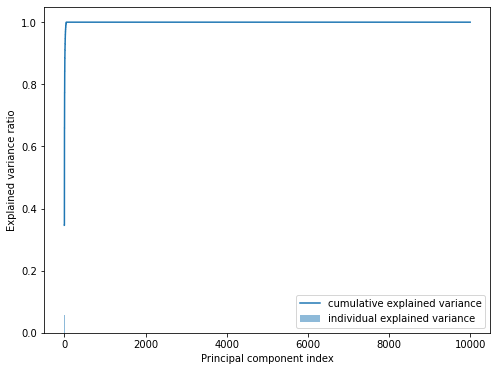

In [ ]:
# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.figure(figsize=(8,6))
plt.bar(range(1,10001), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10001), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

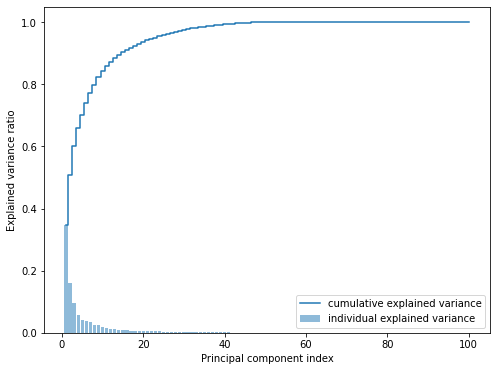

In [ ]:
# first 100 principal components

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.figure(figsize=(8,6))
plt.bar(range(1,101), var_exp[:100], alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,101), cum_var_exp[:100], where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

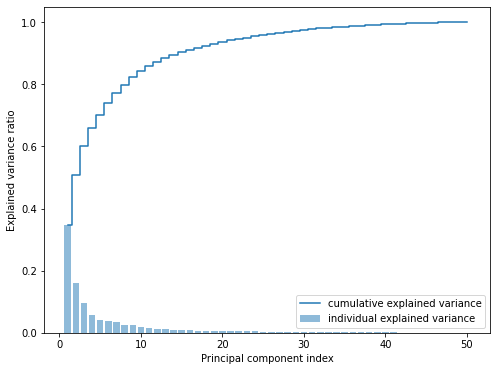

In [ ]:
# first 50 principal components

# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

# plot explained variances
plt.figure(figsize=(8,6))
plt.bar(range(1,51), var_exp[:50], alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,51), cum_var_exp[:50], where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

In [ ]:
eig_pairs = [(eigen_vals[index], eigen_vecs[:,index]) for index in range(len(eigen_vals))]

eig_pairs.sort(key=lambda k: k[0], reverse=True)
eig_vals_sort = [eig_pairs[index][0] for index in range(len(eigen_vals))]
eig_vecs_sort = [eig_pairs[index][1] for index in range(len(eigen_vals))]

In [ ]:
number_chosen_components = 20
reduced_data = np.array(eig_vecs_sort[:number_chosen_components]).T

In [ ]:
print("size of reduced_data :"+str(len(reduced_data)) + ' ' + str(len(reduced_data[0])))

size of reduced_data :10000 20


In [ ]:
W = eig_vecs_sort[0].reshape(eig_vecs_sort[0].shape[0], 1)
for i in range(1,number_chosen_components):
  W = np.hstack((W, eig_vecs_sort[i].reshape(eig_vecs_sort[i].shape[0], 1)))
W.shape

(10000, 20)

In [ ]:
X_train = X.dot(W)
X_train.shape

(50, 20)

In [ ]:
x_test = X_test.dot(W)
x_test.shape

(30, 20)

In [ ]:
# s = 1
# e = 0
# plt.scatter(X_train[:10, s], X_train[:10, e], c='b')
# plt.scatter(X_train[10:20, s], X_train[10:20, e], c='g')
# plt.scatter(X_train[20:30, s], X_train[20:30, e], c='r')
# plt.scatter(X_train[30:40, s], X_train[30:40, e], c='c')
# plt.scatter(X_train[40:50, s], X_train[40:50, e], c='y')
# plt.show()

##Multiclass SVM Algorithm

In [ ]:
def linear_kernel(x1, x2):
  return np.dot(x1, x2)


def polynomial_kernel(x1, x2, p=25):
  return (1 + np.dot(x1, x2)) ** p


def RBF_kernel(x1, x2, sigma=35):
  d = np.linalg.norm(x1 - x2)
  d = -d/(2*(sigma**2))
  return np.exp(d)

In [ ]:
class SVM(object):

  def __init__(self, threshold, kernel=linear_kernel, C=None):
    self.kernel = kernel
    self.C = C
    self.Th = threshold
    if(self.C is not None):
      self.C = float(self.C)

  def train(self, X, y, maxIter = 100):
    X_class, X_data = X.shape

    K = np.zeros((X_class, X_class))
    for i in range(X_class):
      for j in range(X_class):
        K[i,j] = self.kernel(X[i], X[j]) * 1.0

    P = cvxopt.matrix(np.outer(y,y) * K)
    q = cvxopt.matrix(-np.ones(X_class))
    A = cvxopt.matrix(y.reshape(1,-1)*1.0)
    b = cvxopt.matrix(np.zeros(1))

    if(self.C is None):
      G = cvxopt.matrix(np.diag(np.ones(X_class) * -1))
      h = cvxopt.matrix(np.zeros(X_class))
    else:
      t1 = np.diag(np.ones(X_class) * -1)
      t2 = np.identity(X_class)
      G = cvxopt.matrix(np.vstack((t1, t2)))
      t1 = np.zeros(X_class)
      t2 = np.ones(X_class) * self.C
      h = cvxopt.matrix(np.hstack((t1, t2)))

    cvxopt.solvers.options['maxiters'] = maxIter
    solution = cvxopt.solvers.qp(P, q, G, h, A, b)
    
    alpha = np.ravel(solution['x'])

    ind = np.arange(len(alpha))
    support_vectors = alpha > self.Th
    ind = ind[support_vectors]
    self.alpha = alpha[support_vectors]
    self.support_vectors = X[support_vectors]
    self.support_vectors_y = y[support_vectors]
    print("{} support vectors found\n".format(len(self.alpha)))
    print(alpha)


    self.b = 0
    for n in range(len(self.alpha)):
      self.b += self.support_vectors_y[n]
      self.b -= np.sum(self.alpha * self.support_vectors_y * K[ind[n],support_vectors])
    self.b /= len(self.alpha)


  def project(self, X):
    y_predict = np.zeros(len(X))
    for i in range(len(X)):
      s = 0
      for a, sv_y, sv in zip(self.alpha, self.support_vectors_y, self.support_vectors):
        s += a * sv_y * self.kernel(X[i], sv)
      y_predict[i] = s
    return y_predict + self.b

  def predict(self, X):
    return np.sign(self.project(X))
  
  def score(self, X, y):
    pred = self.predict(X)
    true = np.sum(pred == y)
    return true/y.shape[0]

In [ ]:
class multiclass_SVM(object):

  def __init__(self, threshold, kernel=linear_kernel, C=None):
    self.kernel = kernel
    self.C = C
    self.Th = threshold
    if(self.C is not None):
      self.C = float(self.C)

  def train(self, X, y, maxIter = 100):
    self.classes = np.unique(y).shape[0]
    models = []
    for i in range(self.classes):
      print("Training for class ", i, "\n")
      y_t = np.where(y==i, 1, -1)
      model = SVM(self.Th, self.kernel, self.C)
      model.train(X, y_t)
      models.append(model)
    self.models = models


  def predict(self, X):
    predictions = []
    for i in range(self.classes):
      predictions.append(self.models[i].project(X))
    predictions = np.array(predictions)
    return np.argmax(predictions, axis = 0)
  
  def score(self, X, y):
    pred = self.predict(X)
    true = np.sum(pred == y)
    return true/y.shape[0]

##Accuracy for all kernels 

In [ ]:
ker = []
acc = []

model = multiclass_SVM(1e-8, kernel=linear_kernel)
model.train(X_train, y_train)
ker.append("Linear")
acc.append(model.score(x_test, y_test))

model = multiclass_SVM(1e-196, kernel=polynomial_kernel)
model.train(X_train, y_train)
ker.append("Polynomial")
acc.append(model.score(x_test, y_test))

model = multiclass_SVM(0.5, kernel=RBF_kernel)
model.train(X_train, y_train)
ker.append("RBF")
acc.append(model.score(x_test, y_test))

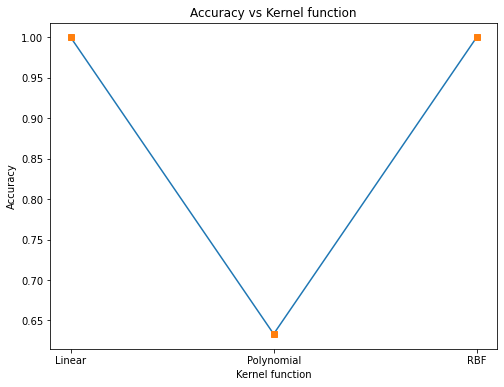

In [ ]:

plt.figure(figsize=(8,6))
plt.plot(ker, acc)
plt.plot(ker, acc, 's')

plt.xlabel("Kernel function")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Kernel function")
#plt.axis([-0.3,3.3,96.4,97.8])
#plt.legend()
plt.show()

In [ ]:
model.predict(x_test)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 4, 4, 4, 4, 4, 4])

In [ ]:
model.score(x_test, y_test)

1.0

##Number of Principal Components vs Accuracy

In [ ]:
ACC = []
KER = ['Linear', 'Polynomial', 'RBF']

for i in [5,10,20,30,40,50]:
  number_chosen_components = i
  reduced_data = np.array(eig_vecs_sort[:number_chosen_components]).T

  W = eig_vecs_sort[0].reshape(eig_vecs_sort[0].shape[0], 1)
  for i in range(1,number_chosen_components):
    W = np.hstack((W, eig_vecs_sort[i].reshape(eig_vecs_sort[i].shape[0], 1)))

  X_train = X.dot(W)

  x_test = X_test.dot(W)

  acc = []

  model = multiclass_SVM(1e-8, kernel=linear_kernel)
  model.train(X_train, y_train)
  acc.append(model.score(x_test, y_test))

  model = multiclass_SVM(1e-197, kernel=polynomial_kernel)
  model.train(X_train, y_train)
  acc.append(model.score(x_test, y_test))

  model = multiclass_SVM(0.5, kernel=RBF_kernel)
  model.train(X_train, y_train)
  acc.append(model.score(x_test, y_test))

  ACC.append(acc)

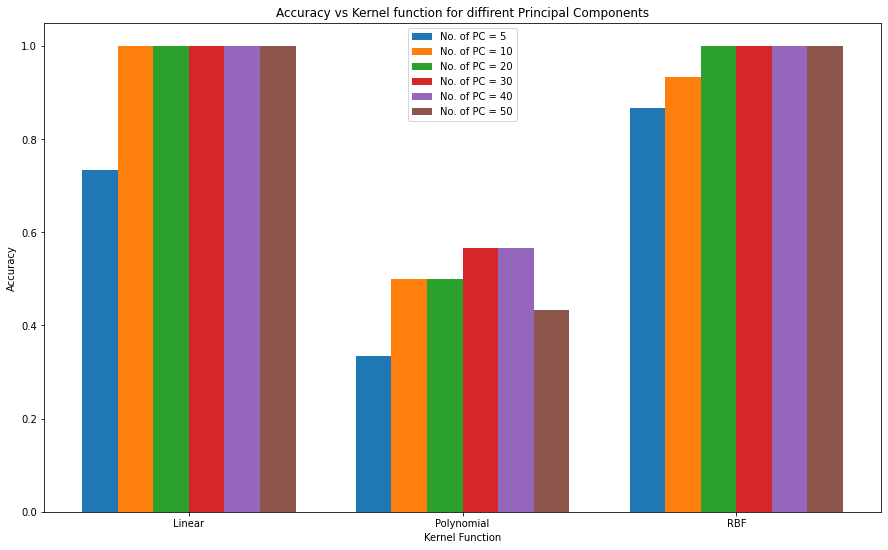

In [ ]:

plt.figure(figsize=(15,9))
index = 0
N = 3
ind = np.arange(N)
width = 0.13

for i in [5,10,20,30,40,50]:
  plt.bar(ind+width*index, ACC[index], width, label = "No. of PC = "+str(i))
  #plt.plot(KER, ACC[index], 's')
  index+=1
plt.xlabel("Kernel Function")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Kernel function for diffirent Principal Components")
#plt.axis([-0.3,3.3,96.4,97.8])
plt.xticks(ind+2.5*width, KER)
plt.legend()
plt.show()

##C vs Accuracy for Linear Kernel

In [ ]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10]
C = list(map(str, C))

In [ ]:
c_acc = []
for i in [0.0001, 0.001, 0.01, 0.1, 1, 10]:
  print(i)
  model = multiclass_SVM(1e-8, kernel=linear_kernel, C=i)
  model.train(X_train, y_train)
  c_acc.append(model.score(x_test, y_test))

0.0001
Training for class  0 

     pcost       dcost       gap    pres   dres
 0: -1.5885e+00 -7.3744e-03  2e+02  1e+01  1e-08
 1: -1.6199e-02 -7.3734e-03  2e+00  1e-01  1e-08
 2: -4.7528e-04 -7.2794e-03  3e-02  2e-03  2e-10
 3: -2.5422e-04 -4.0248e-03  7e-03  3e-04  4e-11
 4: -8.2557e-05 -1.4516e-03  2e-03  9e-05  1e-11
 5:  5.4288e-07 -6.5509e-05  9e-05  2e-06  1e-12
 6: -5.1380e-07 -4.0218e-06  4e-06  2e-08  6e-14
 7: -1.2314e-06 -2.2043e-06  1e-06  5e-09  3e-14
 8: -1.5542e-06 -1.9228e-06  4e-07  5e-10  4e-14
 9: -1.6221e-06 -1.7333e-06  1e-07  1e-10  3e-14
10: -1.6506e-06 -1.6603e-06  1e-08  2e-19  3e-14
Optimal solution found.
17 support vectors found

[1.06765495e-10 1.38545114e-10 8.04665772e-08 9.29426033e-07
 6.22556249e-11 3.13863146e-07 5.55035829e-08 2.20565520e-07
 5.57891571e-11 5.29774497e-08 3.04410346e-07 1.11536537e-09
 1.51181035e-10 1.36897533e-07 7.90363811e-09 1.32170373e-10
 1.45017976e-10 7.47762028e-11 1.24185522e-10 5.45101688e-11
 2.47396637e-07 2.21329462e

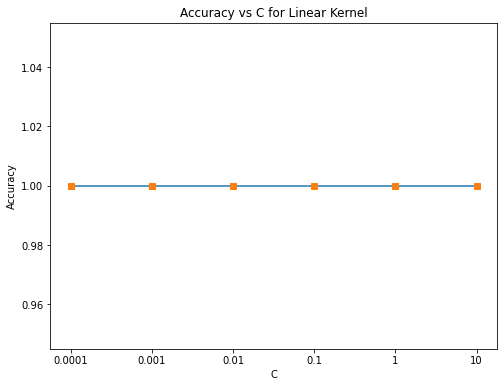

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(C, c_acc)
plt.plot(C, c_acc, 's')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.title("Accuracy vs C for Linear Kernel")
plt.show()

##C vs Accuracy for Polynomial Kernel

In [ ]:
c_acc1 = []
for i in [0.0001, 0.001, 0.01, 0.1, 1, 10]:
  print(i)
  model = multiclass_SVM(1e-196, kernel=polynomial_kernel, C=i)
  model.train(X_train, y_train)
  c_acc1.append(model.score(x_test, y_test))

0.0001
Training for class  0 

     pcost       dcost       gap    pres   dres
 0: -2.3704e-195 -5.0000e-03  1e+02  1e+01  1e-10
 1: -2.3704e-195 -4.9990e-03  1e+00  1e-01  2e-10
 2: -2.3695e-195 -4.9015e-03  1e-02  1e-03  6e-11
 3: -1.0335e-195 -1.2788e-03  1e-03  1e-05  2e-10
 4:  1.9851e-197 -1.2912e-05  1e-05  1e-07  2e-10
 5:  3.2037e-197 -1.2912e-07  1e-07  1e-09  3e-10
 6:  3.2159e-197 -1.2912e-09  1e-09  1e-11  3e-10
Optimal solution found.
6 support vectors found

[-3.70212742e-202 -6.10523560e-197  4.58098745e-196  4.27938629e-199
 -2.39673360e-197  1.14114400e-196  4.49430162e-198  4.26469243e-195
  4.11871385e-202 -1.16264618e-201  1.25546661e-198 -7.05596410e-198
 -9.40808828e-199  2.89995805e-197 -3.98370632e-199 -4.59116565e-198
 -2.97967806e-202  1.37724543e-202  4.09006176e-203  4.67641191e-202
 -9.49962611e-199 -2.56694819e-198 -2.73568865e-199  1.96713223e-199
 -1.35457843e-197 -4.95549085e-199  4.82188008e-198  3.47737501e-202
  5.33860766e-203  2.72417941e-203  1.6

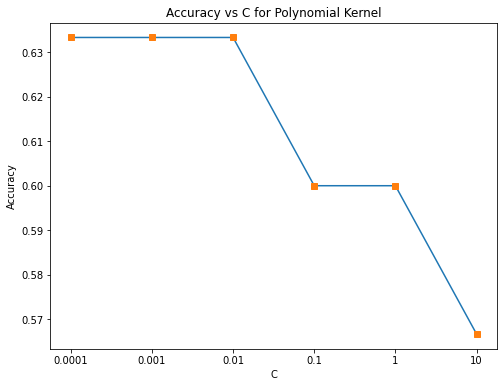

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(C, c_acc1)
plt.plot(C, c_acc1, 's')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.title("Accuracy vs C for Polynomial Kernel")
plt.show()

##C vs Accuracy for RBF Kernel

In [ ]:
c_acc2 = []
for i in [0.0001, 0.001, 0.01, 0.1, 1, 10]:
  print(i)
  model = multiclass_SVM(0, kernel=RBF_kernel, C=i)
  model.train(X_train, y_train)
  c_acc2.append(model.score(x_test, y_test))

0.0001
Training for class  0 

     pcost       dcost       gap    pres   dres
 0: -8.3317e+00 -1.8340e+00  2e+02  2e+01  4e-16
 1: -1.4324e+00 -5.4431e-02  1e+01  1e+00  4e-16
 2: -1.7030e-02 -9.5431e-03  2e-01  1e-02  9e-16
 3: -2.5160e-03 -8.6326e-03  1e-02  3e-04  8e-16
 4: -1.9866e-03 -2.8579e-03  9e-04  1e-19  1e-15
 5: -1.9992e-03 -2.0090e-03  1e-05  1e-19  3e-16
 6: -1.9999e-03 -2.0001e-03  2e-07  1e-19  3e-16
 7: -1.9999e-03 -2.0000e-03  3e-08  2e-19  2e-16
Optimal solution found.
50 support vectors found

[9.99998785e-05 9.99999038e-05 9.99998912e-05 9.99998778e-05
 9.99999011e-05 9.99998793e-05 9.99998770e-05 9.99998886e-05
 9.99998819e-05 9.99998778e-05 2.66589155e-05 2.53803699e-05
 2.27613746e-05 2.49402094e-05 2.31701693e-05 2.77861421e-05
 2.20758319e-05 2.32894130e-05 2.34133083e-05 2.39549193e-05
 2.36827435e-05 2.32394173e-05 2.26324693e-05 2.21045257e-05
 2.42715729e-05 2.22214826e-05 2.52538106e-05 2.24961218e-05
 2.30672961e-05 2.39637091e-05 2.84840861e-05 2.3423

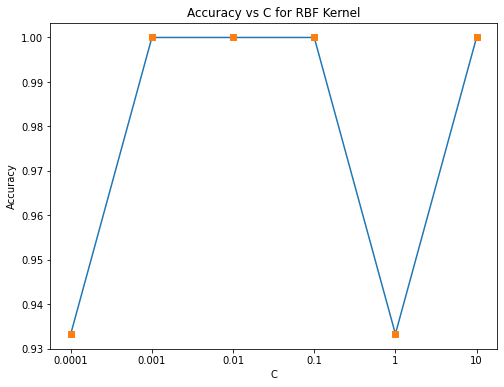

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(C, c_acc2)
plt.plot(C, c_acc2, 's')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.title("Accuracy vs C for RBF Kernel")
plt.show()

##Polynomial kernel degree vs Accuracy

In [ ]:
acc_poly = []

In [ ]:
def linear_kernel1(x1, x2):
  return np.dot(x1, x2)


def polynomial_kernel1(x, y, p=35):
  return (1 + np.dot(x, y)) ** p


def RBF_kernel1(x1, x2, sigma=30):
  d = np.linalg.norm(x1 - x2)
  d = -d/(2*(sigma**2))
  return np.exp(d)

In [ ]:
model = multiclass_SVM(1e-275, kernel=polynomial_kernel1)
model.train(X_train, y_train)
print('\n\n')
print(model.predict(x_test))
print(model.score(x_test, y_test))
#acc_poly.append(model.score(x_test, y_test))

In [ ]:
thres_poly = [1e-14, 1e-23, 1e-30, 1e-38, 1e-46, 1e-54, 1e-64, 1e-73, 1e-79, 1e-118, 1e-157, 1e-196, 1e-236, 1e-275]
poly       = [    2,     3,     4,     5,     6,     7,     8,     9,    10,     15,     20,     25,     30,     35]
#poly = list(map(str, poly))
poly

[2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35]

In [ ]:
acc_poly

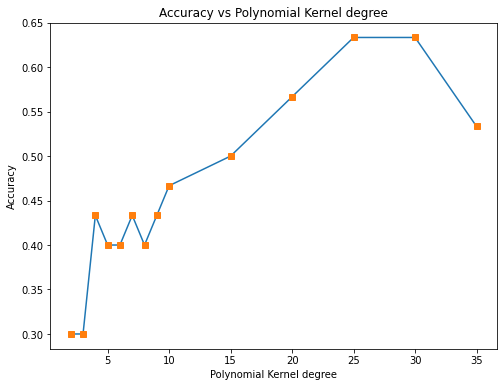

In [ ]:

plt.figure(figsize=(8,6))
plt.plot(poly,acc_poly)
plt.plot(poly,acc_poly,'s')

plt.xlabel("Polynomial Kernel degree")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Polynomial Kernel degree")
#plt.axis([-0.3,3.3,96.4,97.8])
#plt.legend()
plt.show()

##RBF kernel sigma vs Accuracy

In [ ]:
acc_rbf = []

In [ ]:
def linear_kernel1(x1, x2):
  return np.dot(x1, x2)


def polynomial_kernel1(x, y, p=35):
  return (1 + np.dot(x, y)) ** p


def RBF_kernel1(x1, x2, sigma=40):
  d = np.linalg.norm(x1 - x2)
  d = -d/(2*(sigma**2))
  return np.exp(d)

In [ ]:
model = multiclass_SVM(0.5, kernel=RBF_kernel1)
model.train(X_train, y_train)
print('\n\n')
print(model.predict(x_test))
print(model.score(x_test, y_test))
#acc_rbf.append(model.score(x_test, y_test))

In [ ]:
thres_rbf = [1.5, 1.5, 1.5, 1.4, 1.3, 0.9, 0.6, 0.5, 0.5, 0.5]
rbf       = [0.1,   1,   5,  10,  15,  20,  25,  30,  35,  40]
#rbf = list(map(str, rbf))
rbf

['0.1', '1', '5', '10', '15', '20', '25', '30', '35', '40']

In [ ]:
acc_rbf

[0.3333333333333333,
 0.3333333333333333,
 0.4666666666666667,
 0.5666666666666667,
 0.8333333333333334,
 0.9,
 0.9333333333333333,
 0.9333333333333333,
 1.0,
 1.0]

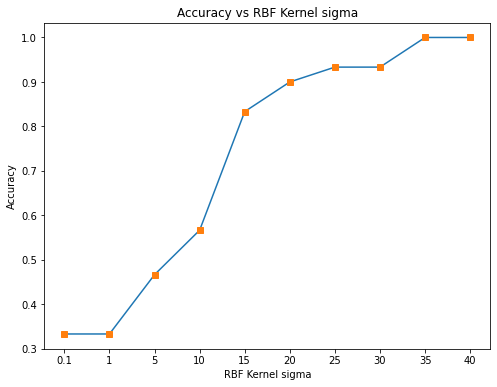

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(rbf,acc_rbf)
plt.plot(rbf,acc_rbf,'s')

plt.xlabel("RBF Kernel sigma")
plt.ylabel("Accuracy")
plt.title("Accuracy vs RBF Kernel sigma")
#plt.axis([-0.3,3.3,96.4,97.8])
#plt.legend()
plt.show()